In [77]:
# magics: ensures that any changes to the modules loaded below will be re-loaded automatically
%load_ext autoreload
%autoreload 2

# load packages
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('seaborn-whitegrid')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Exercise 7 [L5]: Function approximation

Consider the function
$$
f(x) = min \{max\{-1,4(x-0.2\},1\}
$$


### 1. The ex ante code contains an example of how well linear interpolation can approximate this function. Re-do the analysis with: 
<ol type ="a">
<li> Cubic spline (use scipy.interpolate.CubicSpline) </li>
<li> Regression with regular polynomials of 4th order</li>
<li> Regression with Chebyshev polynomials (see Chebyshev.py) </li>
</ol>


Setup


In [78]:
# Define the function 
f = lambda x: np.minimum(np.maximum(-1,4*(x-0.2)),1)

interval = [-1,1]
N_known = 10      # Number of known points
N_true = 1000     # Number of true points
N = 50            # Number of points for interpolation

#Function values
x_true  = np.linspace(interval[0],interval[1],N_true)
f_true  = f(x_true)

# Points you want to interpolate
G = np.linspace(interval[0],interval[1],N)

#known points
x_known = np.linspace(-0.8,0.8,N_known)
f_known = f(x_known)

# Define the plot 
def plot(f_interp):
    fig = plt.figure(figsize=(10,4)) 
    ax = fig.add_subplot(1,1,1)
    ax.plot(x_true,f_true)
    ax.plot(G,f_interp,'red')
    ax.scatter(x_known,f_known)

    ax.set_xlabel("x")
    ax.set_ylabel("$f(x)$")
    plt.legend(('True','Interpolation','known nodes'))
    plt.axvline(x=0.8, ls='--',color='black')
    plt.axvline(x=-0.8,ls='--',color='black')

    plt.show()

Example. Linear interpolation

In [79]:
from scipy import interpolate

# Interpolate
f_linear_func = interpolate.interp1d(x_known,f_known, bounds_error=False, fill_value = "extrapolate")
f_linear_interp = f_linear_func(G)

# Plot
plot(f_linear_interp)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

#### (1) Cubic spline (use scipy.interpolate.CubicSpline)

In [80]:
from scipy.interpolate import CubicSpline

# Interpolate
f_cubicSpine_func = CubicSpline(x_known,f_known,extrapolate=True)

f_cubicSpine_interp = f_cubicSpine_func(G)

# Plot
plot(f_cubicSpine_interp)


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

#### (2) Regression with regular polynomials of 4th order

In [81]:
f_known.shape

(10,)

In [82]:
X.shape

(10, 5)

In [83]:
# 'manual'

# Define the variables for the regression
X = np.transpose([x_known**(i) for i in range(4+1)])
β = np.linalg.inv(X.T@X)@(X.T@f_known)

G_poly = np.transpose([G**(i) for i in range(4+1)])

f_reg_interp = G_poly@β


# Plot
plot(f_reg_interp)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [84]:
# using  polyfit

# Define the variables for the regression
#X = np.transpose([x_known**(i) for i in range(4+1)])
f_poly  = np.polyfit(x_known,f_known,4)
f_poly_fun = np.poly1d(f_poly)

f_reg_interp = f_poly_fun(G)


# Plot
plot(f_reg_interp)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

#### (3) Regression with Chebyshev polynomials (see Chebyshev.py)

In [101]:
G

array([-1.        , -0.95918367, -0.91836735, -0.87755102, -0.83673469,
       -0.79591837, -0.75510204, -0.71428571, -0.67346939, -0.63265306,
       -0.59183673, -0.55102041, -0.51020408, -0.46938776, -0.42857143,
       -0.3877551 , -0.34693878, -0.30612245, -0.26530612, -0.2244898 ,
       -0.18367347, -0.14285714, -0.10204082, -0.06122449, -0.02040816,
        0.02040816,  0.06122449,  0.10204082,  0.14285714,  0.18367347,
        0.2244898 ,  0.26530612,  0.30612245,  0.34693878,  0.3877551 ,
        0.42857143,  0.46938776,  0.51020408,  0.55102041,  0.59183673,
        0.63265306,  0.67346939,  0.71428571,  0.75510204,  0.79591837,
        0.83673469,  0.87755102,  0.91836735,  0.95918367,  1.        ])

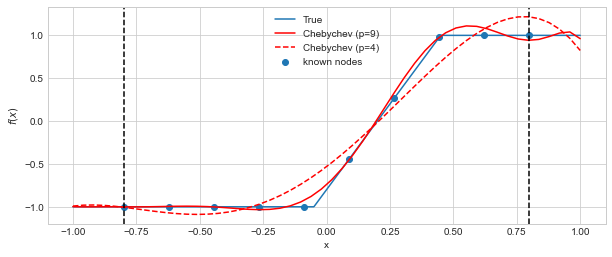

In [88]:
from Chebyshev import Chebyshev

f_chebyshev_9,_,_ = Chebyshev(f,G,N_known,9)
f_chebyshev_4,_,_ = Chebyshev(f,G,N_known,4)


# Plot
fig = plt.figure(figsize=(10,4)) 
ax = fig.add_subplot(1,1,1)
ax.plot(x_true,f_true)
ax.plot(G,f_chebyshev_9,'red')
ax.plot(G,f_chebyshev_4,'red',ls='--')
ax.scatter(x_known,f_known)

ax.set_xlabel("x")
ax.set_ylabel("$f(x)$")
plt.legend(('True','Chebychev (p=9)','Chebychev (p=4)','known nodes'))
plt.axvline(x=0.8, ls='--',color='black')
plt.axvline(x=-0.8,ls='--',color='black')
plt.show()

### Next consider the function
$$
g(x,z) = (x+1)^{0.4} \cdot (z+1)^{0.4} + \mathbb{1}_{zx>0.3}
$$

### 2. Use the ex ante code to investigate how large the error is from using linear interpolation

In [102]:
# Define a function
g = lambda x,z: ((x+1)**0.4)*((z+1)**0.4)+1*(z*x>0.3)

# Values for interpolation
N_true = 500
x_true = np.linspace(0,1,N_true)
z_true = np.linspace(0,1,N_true)
x_true_mat, z_true_mat = np.meshgrid(x_true,z_true)
g_true = g(x_true_mat,z_true_mat) # Fill in

# Known values
N_known = 20
x_known = np.linspace(0,1,N_known)
z_known = np.linspace(0,1,N_known)
x_known_mat, z_known_mat = np.meshgrid(x_known,z_known)
g_known = g(x_known_mat,z_known_mat) #Fill in

# Linear interpolation
g_func_interp = interpolate.interp2d(x_known,z_known,g_known)  #Fill in

g_linear_interp = g_func_interp(x_true,z_true)

In [105]:
g_linear_interp

array([[1.        , 1.00078929, 1.00157858, ..., 1.31844172, 1.31897482,
        1.31950791],
       [1.00078929, 1.0015792 , 1.00236912, ..., 1.31948235, 1.32001587,
        1.32054939],
       [1.00157858, 1.00236912, 1.00315965, ..., 1.32052298, 1.32105692,
        1.32159086],
       ...,
       [1.31844172, 1.31948235, 1.32052298, ..., 2.73828857, 2.73899142,
        2.73969428],
       [1.31897482, 1.32001587, 1.32105692, ..., 2.73899142, 2.73969456,
        2.7403977 ],
       [1.31950791, 1.32054939, 1.32159086, ..., 2.73969428, 2.7403977 ,
        2.74110113]])

In [111]:
%matplotlib inline
%matplotlib widget


In [112]:
# Plot the figure
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1,1,1,projection='3d')

# Plot the surface.
ax.plot_wireframe(x_true_mat, z_true_mat, g_true, color='black')
ax.plot_wireframe(x_true_mat, z_true_mat, g_linear_interp, color='red')
ax.set_xlabel(f'X')
ax.set_ylabel(f'Z')
ax.set_zlabel(f'g(x,z)')
plt.legend(('True','Interpolation'))

plt.show()  

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [75]:
# Plot the interpolation error
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1,1,1,projection='3d')
# Plot the surface.
#ax.plot_wireframe(x_true_mat, z_true_mat,g_linear_interp-g_true)
surf=ax.plot_surface(x_true_mat, z_true_mat,g_linear_interp-g_true, cmap=cm.coolwarm)
# Customize the axis.
ax.set_xlabel(f'X')
ax.set_ylabel(f'Z')
ax.set_zlabel(f'Error')
fig.colorbar(surf, shrink=0.5,aspect=5)

plt.show()  

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [ ]:
%matplotlib widget
%matplotlib inline